In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [16]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

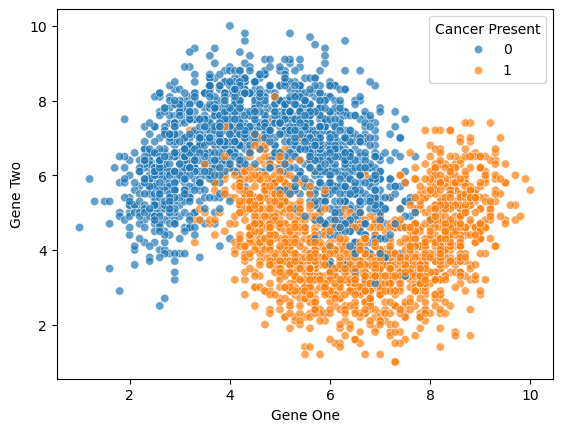

In [17]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) # it transforms the data based on the fit from the training data ( mean and std )

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred = knn_model.predict(scaled_X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.9011111111111111

In [29]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [31]:
# Elbow method to choose the best K value

test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

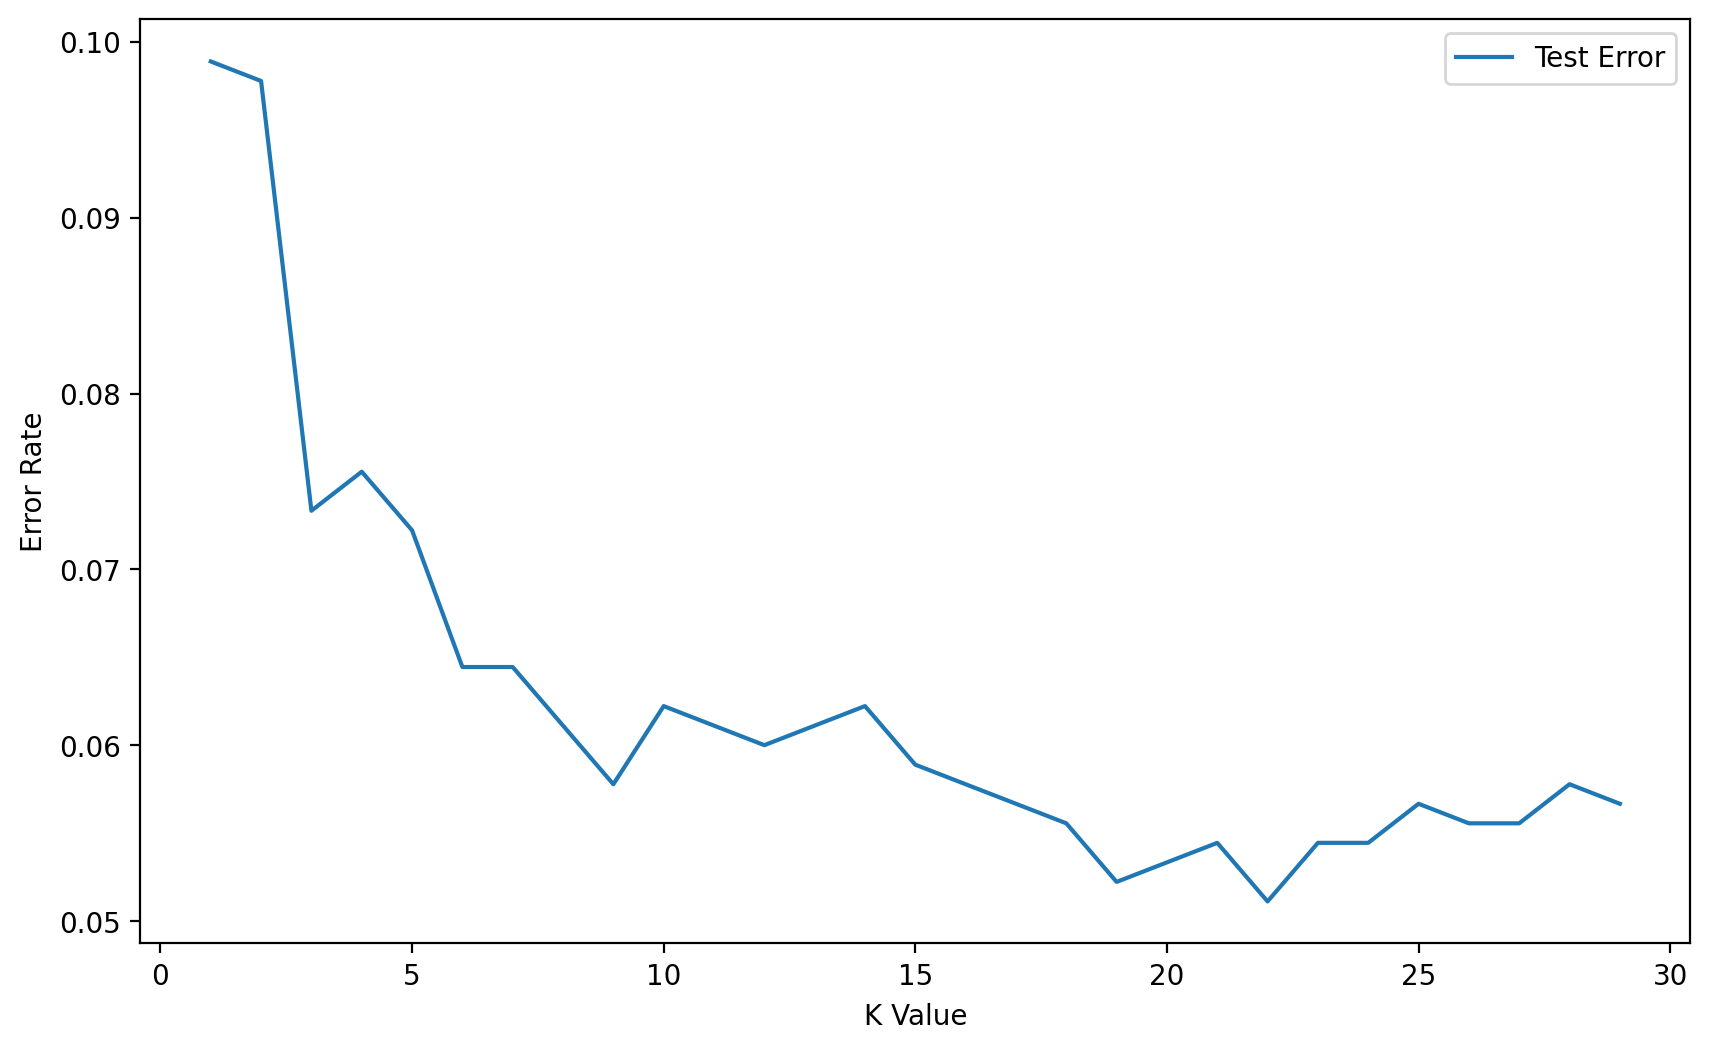

In [32]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [33]:
# LEARN PIPELINE